In [1]:
import numpy as np
import pandas as pd
from fastai.text.all import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/kaggle/input/twitter/Tweets.csv")

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df=df[["text","airline_sentiment"]]

In [5]:
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [6]:
df.shape

(14640, 2)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
Train_data,Test_data=train_test_split(df,test_size=0.3,random_state=7,stratify=df.airline_sentiment.values)

In [9]:
print(Train_data.shape)
print(Test_data.shape)

(10248, 2)
(4392, 2)


In [10]:
Train_data["airline_sentiment"].value_counts()

airline_sentiment
negative    6425
neutral     2169
positive    1654
Name: count, dtype: int64

In [11]:
Test_data.shape

(4392, 2)

In [12]:
from fastai.text.all import TextDataLoaders

In [13]:
dataloader=TextDataLoaders.from_df(Train_data,valid_pct=0.2,seed=7,bs=64,text_col="text",label_col="airline_sentiment")
Test_dataloader=TextDataLoaders.from_df(Test_data,seed=7,bs=32,text_col="text",label_col="airline_sentiment")

from fastai.text.data import DataLoader
from fastai.text.core import DataLoaders
from fastai.text.data import DataBlock, ColReader, CategoryBlock
from fastai.text.data import TextBlock,Pad_Chunk

Pad_Idx = 1  # Define Pad_Idx variable and assign it the value for padding index

# Define a data block for text classification with padding
dblock = DataBlock(blocks=(TextBlock.from_df("text", seq_len=50), CategoryBlock),
                   get_x=ColReader("text"),
                   get_y=ColReader("airline_sentiment"),
                   splitter=None)

# Create a test dataloader from the test dataset
Test_dataloader = DataLoaders.from_dsets(dblock.datasets(Test_data), bs=32, shuffle=False)

In [14]:
type(Test_dataloader)

fastai.data.core.DataLoaders

In [15]:
print(Test_dataloader.valid.items) 

      airline_sentiment  \
1909           negative   
8746           positive   
13221          negative   
14111          positive   
8240           negative   
...                 ...   
5974           negative   
12912          positive   
8905            neutral   
5852           positive   
5150           negative   

                                                                                                                                                                                                                                                     text  \
1909                                                                                                                        [xxbos, @united, involuntarily, bumped, your, passenger, and, ca, n't, guarantee, them, another, flight, for, three, days, !]   
8746                                                   [xxbos, @jetblue, i, just, wanted, to, say, flight, attendant, fitz, was, the, best, tonight, on, flight, #, 1326,

In [16]:
print(dataloader.valid.items) 

     airline_sentiment  \
1692          negative   
8045           neutral   
852           negative   
3438           neutral   
9399          positive   
...                ...   
239           positive   
4637          negative   
9534          negative   
8394          positive   
2385          positive   

                                                                                                                                                                                                                text  \
1692            [xxbos, @united, xxmaj, the, first, time, i, flew, xxmaj, united, was, horrible, thought, i, would, give, you, a, second, chance, ., xxmaj, there, will, xxup, not, be, a, third, !, #, disgruntled]   
8045  [xxbos, @jetblue, xxmaj, let, 's, just, say, #, idontwannalivewithoutyourlove, https, :, /, /, t.co, /, i9kcgaxxfa, #, itwasminttobe, #, bestinclasssocial, #, thankyou, #, xxmaj, travel, #, xxmaj, business]   
852                        [xxbos, @uni

In [17]:
Test_batch=Test_dataloader.show_batch()

,text,category
0,xxbos @united xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup xxunk - jac xxunk / 9 xxup jac - lax 8 / 10 xxup lax - xxunk 13 / 10 . xxmaj i 'm * xxunk xxmaj what is checked bag xxunk for xxup jac - lax ?,neutral
1,xxbos @americanair xxup poor xxup experience 2day at ord xxunk . 8 xxunk . w / 3 cust . 10 waiting . xxmaj asked to speak w / supervisor . xxmaj told 20 min . xxmaj in a xxunk ! ! xxmaj what ? ! ? !,negative
2,xxbos @united xxmaj this is xxup not a xxunk xxup united number for xxmaj xxunk xxunk xxunk xxrep 4 5 8 xxrep 3 0 . xxmaj what is your xxunk xxmaj united xxmaj airlines here in xxmaj xxunk xxmaj xxunk ( xxup xxunk ) ?,neutral
3,xxbos @usairways i left an item on plane xxup bos - phl on xxmaj friday . xxmaj i 've called xxup phl xxup us xxmaj airways # & & left 6 xxunk . xxmaj no return call what to do at this point .,negative
4,xxbos xxup but @united just re - booked to xxup bos ; xxup xxunk ! ! now 3 hour bus to xxup xxunk home . xxmaj could have flown to xxup xxunk & & back to xxup dc in same time . # unitedairlines,negative
5,xxbos @americanair xxmaj all flts to xxup jfk xxmaj cancelled xxmaj flightled xxmaj thx to xxup ur agent at xxup sfo xxmaj i m rebooked on xxup ua . xxmaj did n't get name . xxmaj she was awesome ! # xxunk # xxunk,negative
6,"xxbos @united xxmaj well , xxmaj it 's xxup la and then a xxunk car ride to a xxunk xxmaj palm xxmaj springs technically . xxmaj maybe xxmaj i 'll get bumped to 1st class xxmaj den to xxup phl on xxmaj friday :)",neutral
7,"xxbos @usairways xxmaj customer service is dead . xxmaj last xxunk , flts delayed / xxmaj cancelled xxmaj flighted . xxmaj bags lost 4 days . xxmaj last nt , flt delayed / xxmaj cancelled xxmaj flighted . xxmaj no meal voucher ?",negative
8,"xxbos @united booked award tix on xxunk but xxmaj i 'm not seeing a conf # for them , just the xxmaj united xxmaj flight xxmaj booking xxmaj problems # . xxmaj can you get get the xxmaj xxunk # for me ?",neutral


In [18]:
print("Column Name\tData Type")
print("-------------\t--------")
for col_name, col_data in Test_dataloader.items():
    print(f"{col_name}:\t{col_data.dtype}")

Column Name	Data Type
-------------	--------


TypeError: 'DataFrame' object is not callable

In [19]:
print(dataloader.bs)

64


In [20]:
Trainer=text_classifier_learner(dataloader,AWD_LSTM,drop_mult=0.3, metrics=[accuracy])

 # The recommended order is: Freeze -> Choose Learning Rate -> Unfreeze -> Fine-tune.

SuggestedLRs(valley=0.007585775572806597)

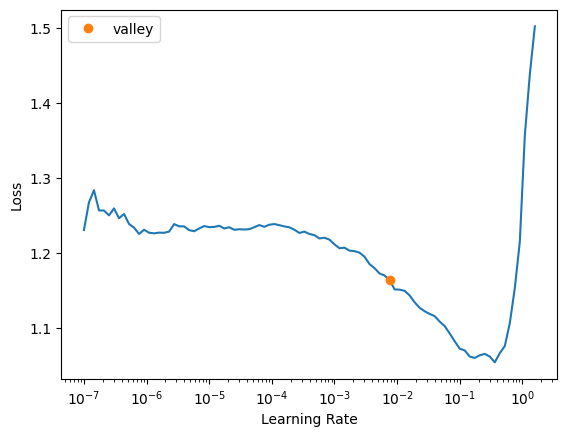

In [21]:
Trainer.freeze()
Trainer.lr_find()

In [22]:
Trainer.fit_one_cycle(1, 7.5e-3)


epoch,train_loss,valid_loss,accuracy,time
0,0.784033,0.616180,0.760371,00:06


SuggestedLRs(valley=1.5848931980144698e-06)

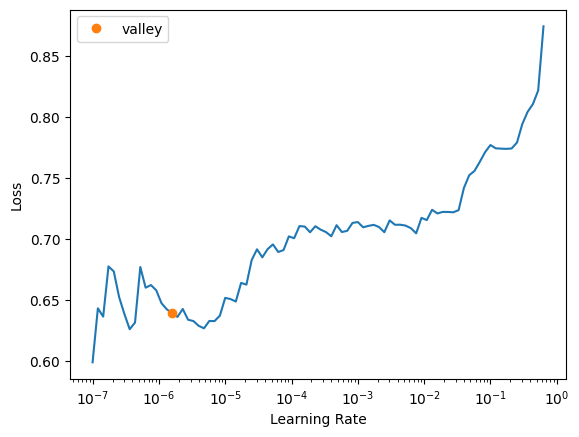

In [23]:
Trainer.freeze()
Trainer.lr_find()

In [24]:
Trainer.fit_one_cycle(5, 1.5e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.695388,0.616562,0.763299,00:06
1,0.722174,0.615481,0.757931,00:07
2,0.715111,0.615073,0.759883,00:07
3,0.695624,0.622305,0.761835,00:07
4,0.706196,0.618965,0.760371,00:07


SuggestedLRs(valley=1.3182567499825382e-06)

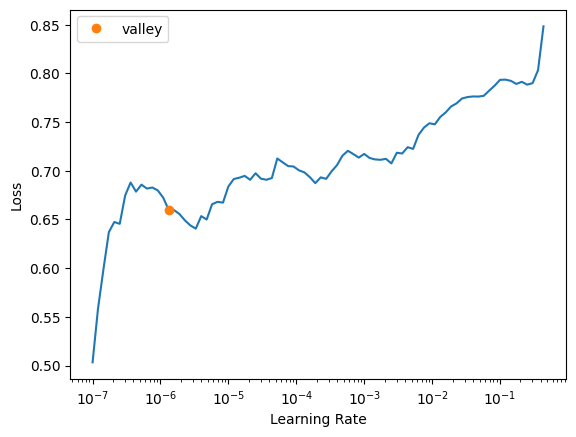

In [25]:
Trainer.freeze_to(-2)
Trainer.lr_find()

In [26]:
Trainer.fit_one_cycle(5, 1.3e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.688822,0.616430,0.760371,00:07
1,0.703223,0.619742,0.762323,00:07
2,0.705318,0.615570,0.763299,00:07
3,0.695909,0.617995,0.760859,00:07
4,0.697748,0.623233,0.759395,00:07


SuggestedLRs(valley=0.004365158267319202)

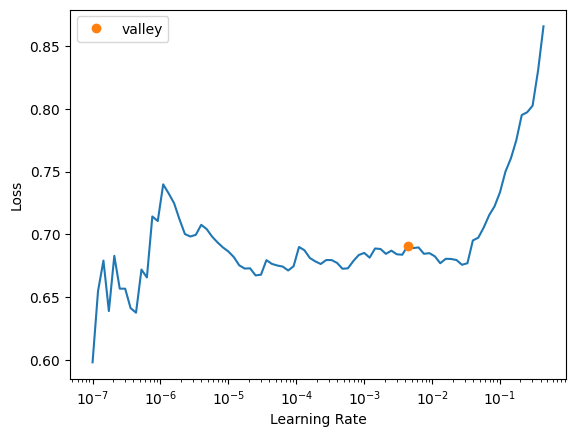

In [27]:
Trainer.unfreeze()
Trainer.lr_find()

In [28]:

Trainer.fit_one_cycle(5,slice(4.3e-03,4.0e-03))

epoch,train_loss,valid_loss,accuracy,time
0,0.632591,0.539513,0.793070,00:11
1,0.532766,0.470899,0.820400,00:12
2,0.380929,0.506357,0.818936,00:11
3,0.184894,0.672716,0.797462,00:11
4,0.080021,0.719082,0.804783,00:12


SuggestedLRs(valley=6.30957365501672e-05)

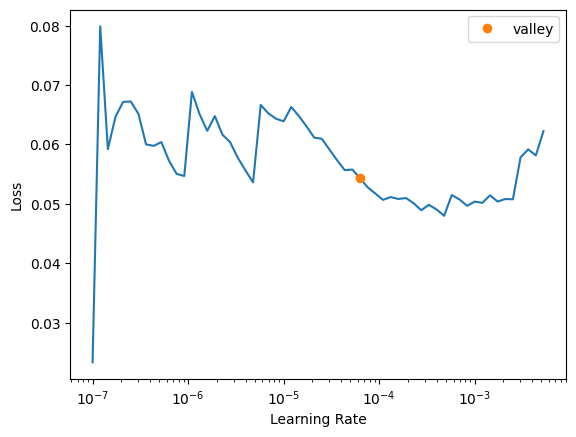

In [29]:
Trainer.unfreeze()
Trainer.lr_find()

In [30]:
Trainer.fit_one_cycle(5,6.3e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.050499,0.731110,0.804295,00:11
1,0.058040,0.751900,0.806247,00:11
2,0.044063,0.783289,0.804295,00:12
3,0.044180,0.803647,0.804783,00:12
4,0.038486,0.799679,0.803319,00:12


In [31]:
from fastai.vision.all import *

In [32]:
preds,y_true,losses=Trainer.get_preds(with_loss=True)

In [33]:
print("Data Types:")
print("preds:", preds.dtype)
print("y_true:", y_true.dtype)
print("losses:", losses.dtype)

Data Types:
preds: torch.float32
y_true: torch.int64
losses: torch.float32


In [34]:
print(len(preds))
print(y_true[0])
print(losses[0])

2049
tensor(0)
TensorBase(0.0020)


In [35]:
help( ClassificationInterpretation.from_learner)

Help on method from_learner in module fastai.interpret:

from_learner(learn, ds_idx: 'int' = 1, dl: 'DataLoader' = None, act=None) method of builtins.type instance
    Construct interpretation object from a learner



In [36]:
interp = ClassificationInterpretation.from_learner(Trainer)

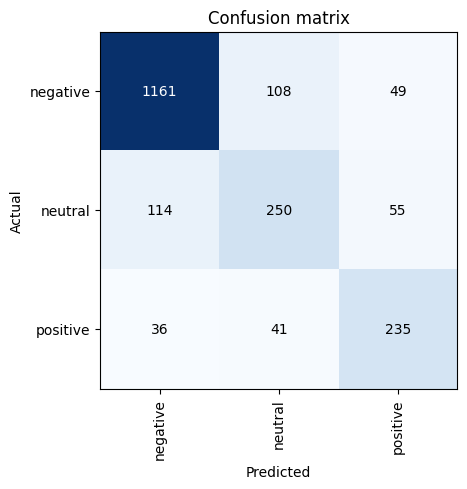

In [37]:
interp.plot_confusion_matrix()

In [38]:
Trainer.predict("This is one of the worst movie I have ever seen in my life.")

('negative', tensor(0), tensor([0.9971, 0.0013, 0.0016]))

In [39]:
Trainer.predict("The movie represented a social issue and this types of movies are very important for our society to make it better.")

('positive', tensor(2), tensor([0.4117, 0.1585, 0.4298]))

In [40]:
Trainer.predict("One time watchable.")

('neutral', tensor(1), tensor([0.0591, 0.5805, 0.3603]))

from fastai.callback.progress import ProgressCallback

recorder = ProgressCallback()

Trainer.fit(1, cbs=[recorder])

# Access the train and validation metrics from the Recorder
# Note: Ensure that the Recorder callback is properly configured to record losses during training
train_losses = recorder.losses if hasattr(recorder, 'losses') else None
train_accuracy = recorder.metrics[0][0] if hasattr(recorder, 'metrics') else None  # Train accuracy is usually the first metric
valid_losses = recorder.val_losses if hasattr(recorder, 'val_losses') else None
valid_accuracy = recorder.metrics[1][0] if hasattr(recorder, 'metrics') else None  # Validation accuracy is usually the second metric

print("Train Loss:", train_losses)
print("Train Accuracy:", train_accuracy)
print("Validation Loss:", valid_losses)
print("Validation Accuracy:", valid_accuracy)
